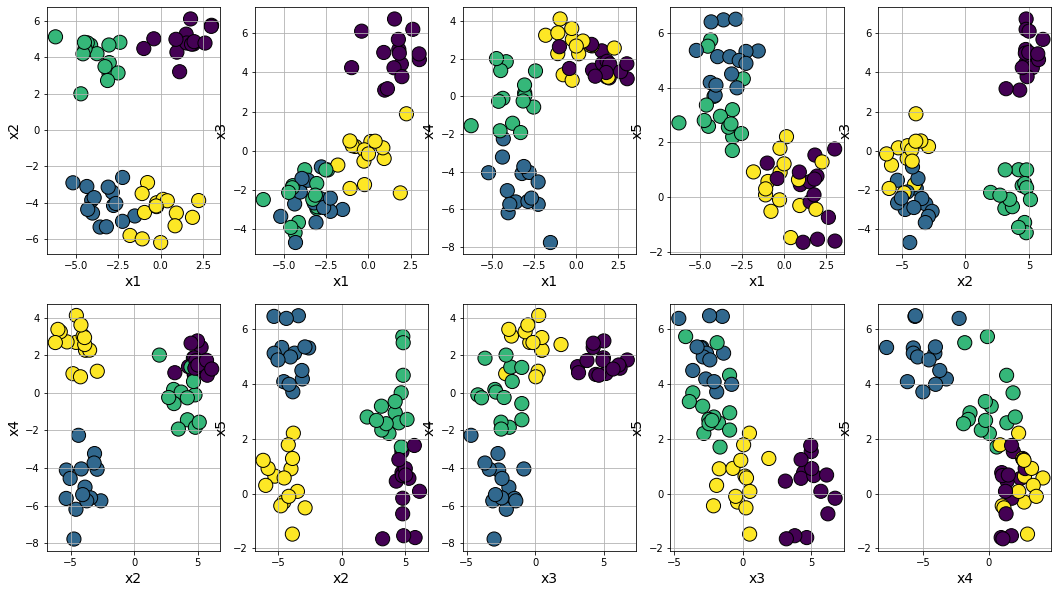

In [50]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from rerf.urerf import UnsupervisedRandomForest
from sklearn.preprocessing import StandardScaler

data = make_blobs(n_samples=60, n_features=5, centers=4, cluster_std=1.0, 
                   center_box=(-5.0, 5.0), shuffle=True, random_state=None)
df = pd.DataFrame(data[0],columns=['x'+str(i) for i in range(1,6)])
df['y'] = data[1]
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from itertools import combinations
from math import ceil
lst_var=list(combinations(df.columns[:-1],2))
len_var = len(lst_var)
plt.figure(figsize=(18,10))
for i in range(1,len_var+1):
    plt.subplot(2,ceil(len_var/2),i)
    var1 = lst_var[i-1][0]
    var2 = lst_var[i-1][1]
    plt.scatter(df[var1],df[var2],s=200,c=df['y'],edgecolor='k')
    plt.xlabel(var1,fontsize=14)
    plt.ylabel(var2,fontsize=14)
    plt.grid(True)

In [51]:
df.shape

(60, 6)

In [52]:
#2 SVD 
from numpy import array
from sklearn.decomposition import TruncatedSVD

# svd
svd = TruncatedSVD(n_components=2)
svd.fit(X)
result = svd.transform(X)
#print(result)

Text(0, 0.5, 'SVD 2')

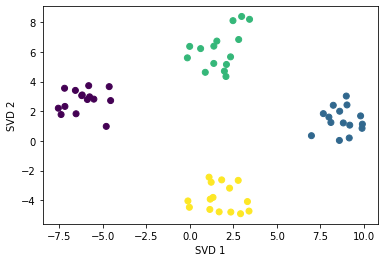

In [53]:
plt.scatter(result[:, 0], result[:, 1], c = df['y'])
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')

In [54]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, 
                                  memory=None, 
                                  connectivity=None)
predict_labels = cluster.fit_predict(result)
score = adjusted_rand_score(df['y'] , predict_labels)
score

1.0

[[1.    0.    0.251 ... 0.002 0.032 0.058]
 [0.001 1.    0.001 ... 0.006 0.    0.   ]
 [0.245 0.    1.    ... 0.004 0.044 0.048]
 ...
 [0.001 0.003 0.004 ... 1.    0.003 0.001]
 [0.02  0.    0.03  ... 0.006 1.    0.013]
 [0.06  0.    0.07  ... 0.    0.012 1.   ]]


(60, 60)

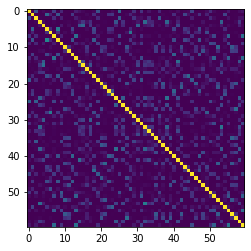

In [55]:
#With USPORF 
clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)
clf.fit(X)
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)
sim_mat.shape

In [56]:
from numpy import array
from sklearn.decomposition import TruncatedSVD

# svd
svd1 = TruncatedSVD(n_components=2)
svd1.fit(sim_mat)
result1 = svd1.transform(sim_mat)

In [57]:
result1.shape

(60, 2)

Text(0, 0.5, 'SVD 2')

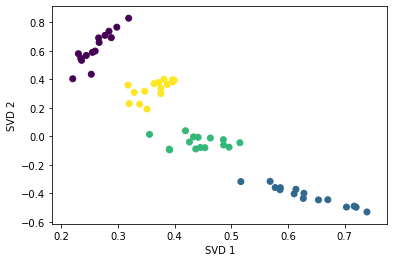

In [58]:
plt.scatter(result1[:, 0], result1[:, 1], c = df['y'])
plt.xlabel('SVD 1')
plt.ylabel('SVD 2')

In [59]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, 
                                  memory=None, 
                                  connectivity=None)
predict_labels = cluster.fit_predict(result1)
score = adjusted_rand_score(df['y'] , predict_labels)
score

1.0